In [1]:
%matplotlib inline
# math libs
import math
import numpy as np
from scipy.spatial import distance

# plotting libs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random

In [2]:
def parse_points(points):
    X = [elem[0] for elem in points]
    Y = [elem[1] for elem in points]
    Z = [elem[2] for elem in points]
    return X, Y, Z

def gen_random_point(dim, lower=-1e1, upper=1e1):
    return [random.uniform(lower, upper) for i in range(dim)]

### A projected Weiszfeld algorithm for the box-constrained Weber location problem

Let $a_1, ... , a_m$ be m pointas in the space $R^n$ (vertices) and positive numbers $w_1, ... ,w_m$ weights.

In [3]:
a = np.array([        
        np.array([1,-1,1]),
        np.array([1,-1,-1]),
        np.array([1,1,1]),
        np.array([1,1,-1]),
        np.array([-1,1,1]),
        np.array([-1,1,-1]),
        np.array([-1,-1,1]),
        np.array([-1,-1,-1]),
        np.array([1.5,0,0]),
        np.array([-1.5,0,0]),
        np.array([0,1.5,0]),
        np.array([0,-1.5,0]),
        np.array([0,0,1.5]),
        np.array([0,0,-1.5])
    ])

In [4]:
w = np.array([random.randint(1, 1e1) for i in range(len(a))])
w

array([8, 7, 7, 1, 8, 1, 1, 1, 2, 9, 3, 3, 4, 2])

In [5]:
def T(x):
    for i in range(len(a)):
        if np.array_equal(x, a[i]):
            return a[i]
    
    numerator = 0.
    denominator = 0.
    for j in range(len(a)):
        norm = distance.euclidean(x, a[j])
        numerator = numerator + w[j] * a[j] / norm
        denominator = denominator + w[j] / norm
        
    return numerator / denominator

### Algorithm 1. Weiszfeld algorithm

##### Step 1

Compute: $$x^{(k+1)} = T(x^{(k)})$$

##### Step 2

Stop execution if 

$$\lVert x^{(k+1)} - x^{(k)} \rVert < \varepsilon $$


In [6]:
def Weiszfeld(x_0, epsilon=1e-5):
    x = x_0
    next_x = T(x)
    points = [x_0, next_x]
    
    while not distance.euclidean(next_x, x) < epsilon:
        tmp = next_x
        next_x = T(x)
        x = tmp
        points.append(next_x)
    
    return points

In [7]:
points = Weiszfeld(np.array([2,2,2]), 1e-10)
points

[array([2, 2, 2]),
 array([ 0.18914975,  0.17608971,  0.46341608]),
 array([ 0.18914975,  0.17608971,  0.46341608])]

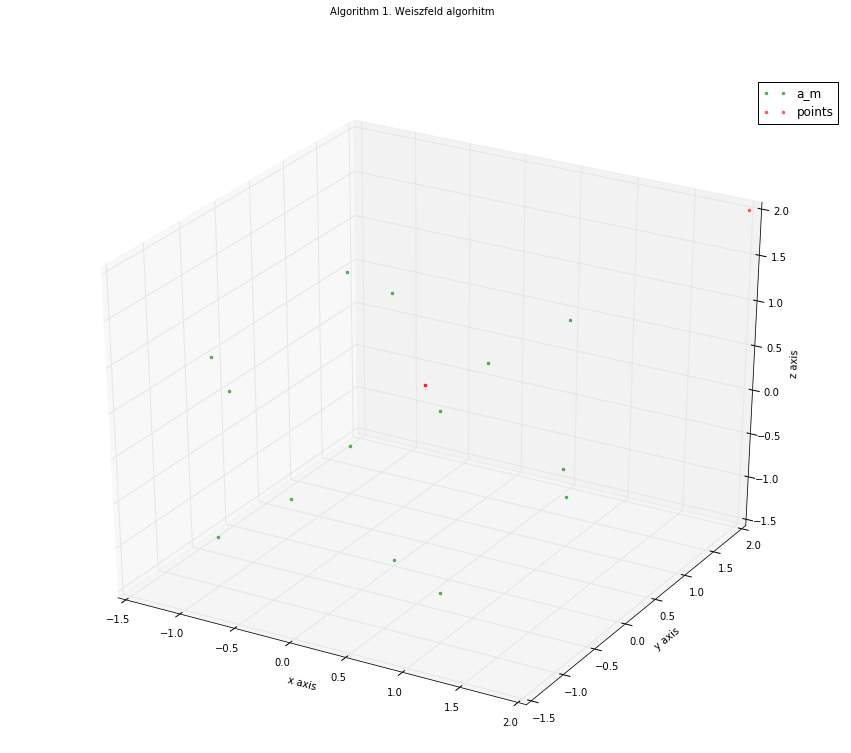

In [8]:
figure = plt.figure(figsize=(15,12))
ax = figure.gca(projection='3d')

pp = parse_points(a)
ax.plot(pp[0], pp[1], pp[2], 'g.', alpha=0.6)

pp = parse_points(points)
ax.plot(pp[0], pp[1], pp[2], 'r.', alpha=0.6)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
figure.suptitle('Algorithm 1. Weiszfeld algorhitm')
ax.legend(['a_m', 'points'])

### Algorithm 2. Projected Weiszfeld algorithm

Given $l, u \in R^n$ define $\Omega = \{ x \in R^n : l \leq x \leq u \}$. Assume that $x^{(0)} \in \Omega - \{a_1,...,a_m\}$ is an initial approximations  tolerance. Given $x^{(k)} \in \Omega$ do the following steps to compute $x^{(k+1)}$

##### Step 1

Compute: $$x^{(k+1)}_T = T(x^{(k)})$$

##### Step 2

Project onto the box $\Omega$ 

$$ x^{(k+1)} = P(x^{(k)}_T)$$

##### Step 3

Stop the execution if

$$\lVert x^{(k+1)} - x^{(k)} \rVert < \varepsilon $$

and declare $x^{(k+1)}$ as solution to the problem $argmin$ $f(x)$ (where f is called the Weber function).


In [9]:
def P(x, l, u): 
    ans = x
    for i in range(len(x)):
        if x[i] < l[i]:
            ans[i] = l[i]
        if x[i] > u[i]:
            ans[i] = u[i]
    return ans

In [10]:
def Projected_Weiszfeld(x_0, epsilon=1e-5):
    l = gen_random_point(len(a), -10, 0)
    u = gen_random_point(len(a), 0, 10)
    
    x = x_0
    next_x = P(T(x_0))
    
    points = [x_0, next_x]
    
    while not distance.euclidean(next_x, x) < epsilon:
        tmp = next_x
        next_x = P(T(x), l, u)
        x = tmp
        points.append(next_x)
    
    return points

In [11]:
points = Weiszfeld(gen_random_point(3, 1, 2), 1e-10)
points

[[1.1002084074243101, 1.806700527313176, 1.9749596850885767],
 array([ 0.16999281,  0.24406118,  0.51579891]),
 array([ 0.16999281,  0.24406118,  0.51579891])]

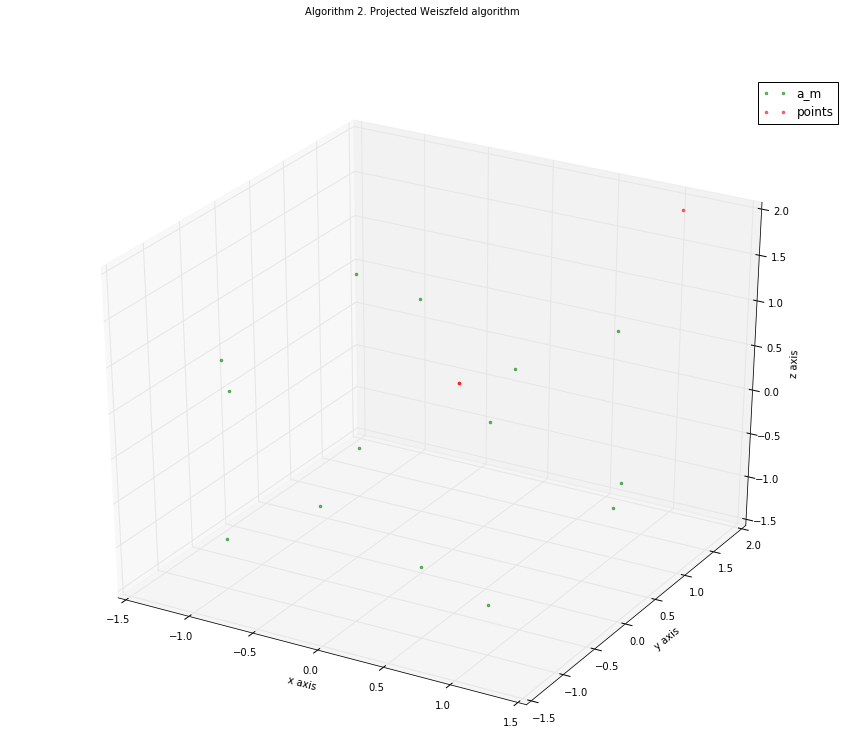

In [12]:
figure = plt.figure(figsize=(15,12))
ax = figure.gca(projection='3d')

pp = parse_points(a)
ax.plot(pp[0], pp[1], pp[2], 'g.', alpha=0.6)

pp = parse_points(points)
ax.plot(pp[0], pp[1], pp[2], 'r.', alpha=0.6)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
figure.suptitle('Algorithm 2. Projected Weiszfeld algorithm')
ax.legend(['a_m', 'points'])